In [1]:
import scipy.io as sio
import numpy as np
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from helpers.simulateData import *
from helpers.fs_methods import *

In [2]:
kf5=KFold(n_splits=5,shuffle=True)
kf10=KFold(n_splits=10,shuffle=True)
loo=LeaveOneOut()

## Simulate Data

### 41 AD and 36 LMCI with 35 ROIs 

In [4]:
#* * (1) Some variables are described.
mu1 = 0.9 #Mean value of the first Gaussian distribution
sigma1 = 0.4 #Standard deviation value of the first Gaussian distribution
mu2 = 0.7 #Mean value of the second Gaussian distribution
sigma2 = 0.6 #Standard deviation value of the first Gaussian distribution
#Nf = 5 #number of selected features
Featurematrix,Subjects,Labels=simulate_data(mu1,sigma1,mu2,sigma2)

Select the number of class 1 graphs:  41
Select the number of class 2 graphs:  36
Select the number of nodes (i.e., ROIS for brain graphs):  35


In [5]:
X=Featurematrix
y=Labels
y=y[:, 0]
n_samples, n_features = X.shape

In [6]:
y

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [7]:
X.shape

(77, 595)

In [8]:
# Number of selected features (top k ranked features)
#top K selected features varying from 10 to 100 (with a step size of 10 features)
num_fea = [i for i in range(10,110,10)]
clf = svm.LinearSVC()    # linear SVM
correct=0
accuracy=[]

### Feature selection methods

### Vizualize classification results

In [9]:
  #   X_train, X_test = X[train_index], X[test_index]
k=10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
     #   y_train, y_test = y[train_index], y[test_index]
#if FS_method==reliefF:
idx,score=relief_FS(X_train,y_train)

selected_features_train = X_train[:, idx]
selected_features_test = X_test[:, idx]
    # train a classification model with the selected features on the training dataset
clf.fit(selected_features_train, y_train)  # predict the class labels of test data
y_predict = clf.predict(selected_features_test)
    # obtain the classification accuracy on the test data
acc = accuracy_score(y_test, y_predict)

In [10]:

print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[ 0 10]
 [ 0 16]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00        10
         1.0       0.62      1.00      0.76        16

    accuracy                           0.62        26
   macro avg       0.31      0.50      0.38        26
weighted avg       0.38      0.62      0.47        26



/home/raoua/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
pca = PCA(n_components=2).fit(selected_features_train)
pca_2d = pca.transform(selected_features_train)

In [12]:
pca_2d[:,1]

array([ 0.11281939,  0.21235363, -0.09401972,  1.26474487,  0.31267855,
       -3.08098487, -3.19207001, -0.10790115,  0.49926259,  0.82599513,
       -2.03396602, -0.35663944,  3.66258588, -0.67626191,  0.48933298,
        0.79690841, -0.39197119, -2.02112748,  0.03102639,  0.26806968,
       -2.40206023, -0.37382329,  5.61343377, -3.98872559,  0.95990189,
       -0.0140498 , -0.6844814 ,  0.1090563 ,  0.71898405,  0.61510839,
       -0.02066971, -1.43817182,  0.10219127, -0.46679235,  0.01626537,
        4.73191082, -1.81763045, -1.8317156 , -0.25769955, -0.83220324,
        0.06884404,  0.6549621 ,  3.26215995,  0.7202894 , -0.08913708,
       -0.53676008,  0.16948951, -1.15943891,  1.57509098,  0.53607286,
       -0.46123734])

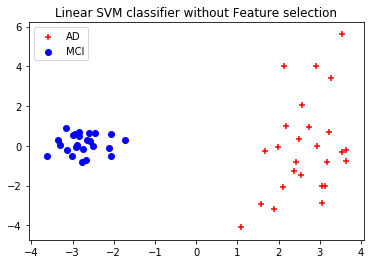

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(selected_features_train)
pca_2d = pca.transform(selected_features_train)
import pylab as pl
for i in range(0, pca_2d.shape[0]):
    if y_train[i] == -1:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',    marker='+')
    elif y_train[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',    marker='o')

pl.legend([c1, c2], ['AD', 'MCI'])
pl.title('Linear SVM classifier without Feature selection')
pl.show()

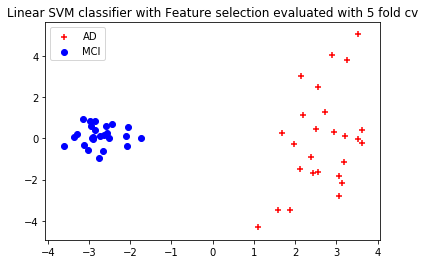

In [14]:

pca = PCA(n_components=2).fit(selected_features_train)
pca_2d = pca.transform(selected_features_train)
import pylab as pl
for i in range(0, pca_2d.shape[0]):
    if y_train[i] == -1:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',    marker='+')
    elif y_train[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',    marker='o')

pl.legend([c1, c2], ['AD', 'MCI'])
pl.title('Linear SVM classifier with Feature selection evaluated with 5 fold cv')
pl.show()

____________________________________________________________________________________

### Training

In [15]:
from helpers.training import *

In [16]:
ranks,accs,weights=training(kf5,10,reliefF,X,y)

In [17]:
ranks

array([127, 356, 418, 332, 457,  99, 484, 388, 309, 421])

In [18]:
pool_FS=[reliefF,lap_score,ll_l21,ls_l21,UDFS,fisher_score,chi_square,gini_index,SPEC]#,BorutaPy]#,MCFS]#trace_ratio,

## Training

### Using 9 FS methods and  3 Cross-validation (5-fold, 10-fold, LOO)

In [27]:
from helpers.training import *
from helpers.fs_methods import *

In [ ]:
dataframe_ranking_5fold,dataframe_accuracies_5fold,dataframe_weights_5fold=fs_training(kf5,X,y,num_fea)
dataframe_ranking_10fold,dataframe_accuracies_10fold,dataframe_weights_10fold=fs_training(kf10,X,y,num_fea)
dataframe_ranking_loo,dataframe_accuracies_loo,dataframe_weights_loo=fs_training(LOO,X,y,num_fea)

### Overlapping matrices

In [5]:
from helpers.similarities import *

In [6]:
dataframe_ranking_5fold['overlapping']=dataframe_ranking_5fold.apply(
    lambda row:FS_to_FS_similarity(row),axis=1)

In [7]:
dataframe_ranking_10fold['overlapping']=dataframe_ranking_10fold.apply(
    lambda row:FS_to_FS_similarity(row),axis=1)

In [8]:
dataframe_ranking_loo['overlapping']=dataframe_ranking_loo.apply(
    lambda row:FS_to_FS_similarity(row),axis=1)

In [10]:
def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)
check_symmetric(dataframe_ranking_5fold.overlapping[10])

True

#### 5-fold

In [11]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'num_fea=100')

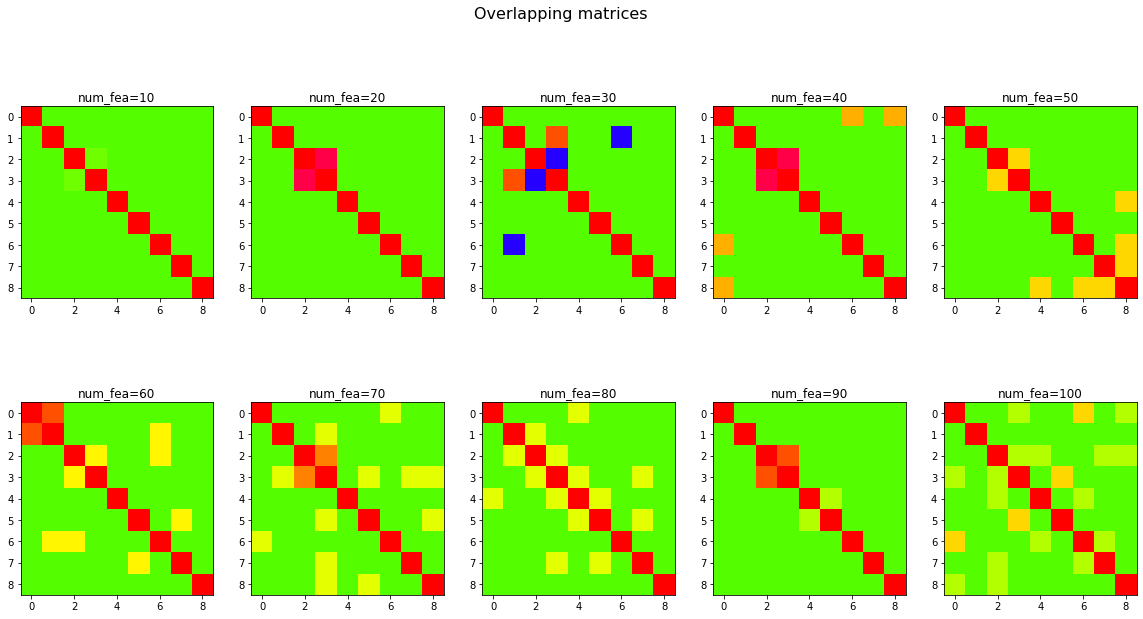

In [12]:

plt.figure(figsize=(20,10))
plt.suptitle('Overlapping matrices', fontsize=16)

plt.subplot(2, 5, 1)
plt.imshow(dataframe_ranking_5fold.overlapping[10],cmap=plt.cm.prism_r)
plt.title('num_fea=10')
plt.subplot(2, 5, 2)
plt.imshow(dataframe_ranking_5fold.overlapping[20],cmap=plt.cm.prism_r)
plt.title('num_fea=20')
plt.subplot(2, 5, 3)
plt.imshow(dataframe_ranking_5fold.overlapping[30],cmap=plt.cm.prism_r)
plt.title('num_fea=30')
plt.subplot(2, 5, 4)
plt.imshow(dataframe_ranking_5fold.overlapping[40],cmap=plt.cm.prism_r)
plt.title('num_fea=40')
plt.subplot(2, 5, 5)
plt.imshow(dataframe_ranking_5fold.overlapping[50],cmap=plt.cm.prism_r)
plt.title('num_fea=50')
plt.subplot(2, 5, 6)
plt.imshow(dataframe_ranking_5fold.overlapping[60],cmap=plt.cm.prism_r)
plt.title('num_fea=60')
plt.subplot(2, 5, 7)
plt.imshow(dataframe_ranking_5fold.overlapping[70],cmap=plt.cm.prism_r)
plt.title('num_fea=70')
plt.subplot(2, 5, 8)
plt.imshow(dataframe_ranking_5fold.overlapping[80],cmap=plt.cm.prism_r)
plt.title('num_fea=80')
plt.subplot(2, 5, 9)
plt.imshow(dataframe_ranking_5fold.overlapping[90],cmap=plt.cm.prism_r)
plt.title('num_fea=90')
plt.subplot(2, 5, 10)
plt.imshow(dataframe_ranking_5fold.overlapping[100],cmap=plt.cm.prism_r)
plt.title('num_fea=100')

#### 10-fold

Text(0.5, 1.0, 'num_fea=100')

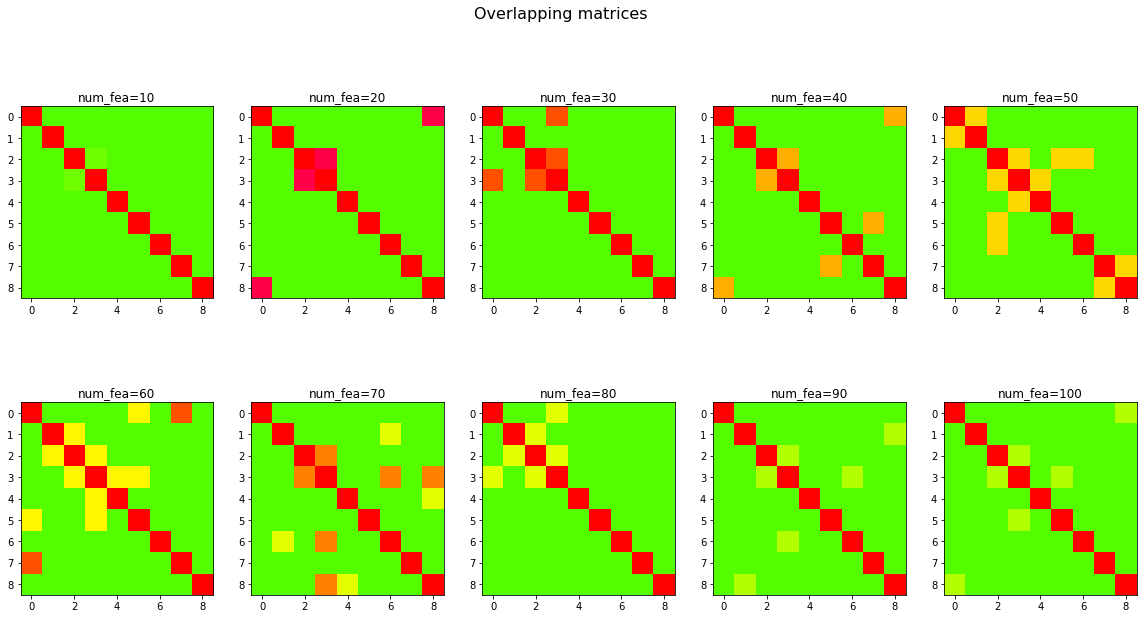

In [15]:
plt.figure(figsize=(20,10))
plt.suptitle('Overlapping matrices', fontsize=16)
plt.subplot(2, 5, 1)
plt.imshow(dataframe_ranking_10fold.overlapping[10],cmap=plt.cm.prism_r)
plt.title('num_fea=10')
plt.subplot(2, 5, 2)
plt.imshow(dataframe_ranking_10fold.overlapping[20],cmap=plt.cm.prism_r)
plt.title('num_fea=20')
plt.subplot(2, 5, 3)
plt.imshow(dataframe_ranking_10fold.overlapping[30],cmap=plt.cm.prism_r)
plt.title('num_fea=30')
plt.subplot(2, 5, 4)
plt.imshow(dataframe_ranking_10fold.overlapping[40],cmap=plt.cm.prism_r)
plt.title('num_fea=40')
plt.subplot(2, 5, 5)
plt.imshow(dataframe_ranking_10fold.overlapping[50],cmap=plt.cm.prism_r)
plt.title('num_fea=50')
plt.subplot(2, 5, 6)
plt.imshow(dataframe_ranking_10fold.overlapping[60],cmap=plt.cm.prism_r)
plt.title('num_fea=60')
plt.subplot(2, 5, 7)
plt.imshow(dataframe_ranking_10fold.overlapping[70],cmap=plt.cm.prism_r)
plt.title('num_fea=70')
plt.subplot(2, 5, 8)
plt.imshow(dataframe_ranking_10fold.overlapping[80],cmap=plt.cm.prism_r)
plt.title('num_fea=80')
plt.subplot(2, 5, 9)
plt.imshow(dataframe_ranking_10fold.overlapping[90],cmap=plt.cm.prism_r)
plt.title('num_fea=90')
plt.subplot(2, 5, 10)
plt.imshow(dataframe_ranking_10fold.overlapping[100],cmap=plt.cm.prism_r)
plt.title('num_fea=100')

##### LOO

Text(0.5, 1.0, 'num_fea=100')

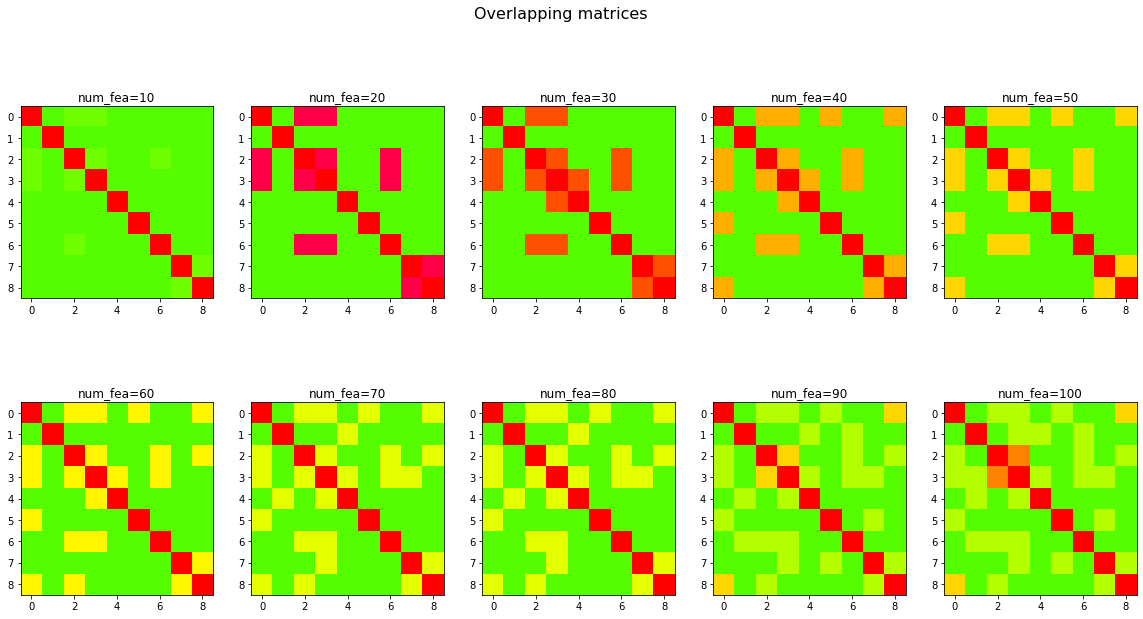

In [16]:
plt.figure(figsize=(20,10))
plt.suptitle('Overlapping matrices', fontsize=16)
plt.subplot(2, 5, 1)
plt.imshow(dataframe_ranking_loo.overlapping[10],cmap=plt.cm.prism_r)
plt.title('num_fea=10')
plt.subplot(2, 5, 2)
plt.imshow(dataframe_ranking_loo.overlapping[20],cmap=plt.cm.prism_r)
plt.title('num_fea=20')
plt.subplot(2, 5, 3)
plt.imshow(dataframe_ranking_loo.overlapping[30],cmap=plt.cm.prism_r)
plt.title('num_fea=30')
plt.subplot(2, 5, 4)
plt.imshow(dataframe_ranking_loo.overlapping[40],cmap=plt.cm.prism_r)
plt.title('num_fea=40')
plt.subplot(2, 5, 5)
plt.imshow(dataframe_ranking_loo.overlapping[50],cmap=plt.cm.prism_r)
plt.title('num_fea=50')
plt.subplot(2, 5, 6)
plt.imshow(dataframe_ranking_loo.overlapping[60],cmap=plt.cm.prism_r)
plt.title('num_fea=60')
plt.subplot(2, 5, 7)
plt.imshow(dataframe_ranking_loo.overlapping[70],cmap=plt.cm.prism_r)
plt.title('num_fea=70')
plt.subplot(2, 5, 8)
plt.imshow(dataframe_ranking_loo.overlapping[80],cmap=plt.cm.prism_r)
plt.title('num_fea=80')
plt.subplot(2, 5, 9)
plt.imshow(dataframe_ranking_loo.overlapping[90],cmap=plt.cm.prism_r)
plt.title('num_fea=90')
plt.subplot(2, 5, 10)
plt.imshow(dataframe_ranking_loo.overlapping[100],cmap=plt.cm.prism_r)
plt.title('num_fea=100')

## Average similarity matrix

In [13]:
average_similarity_5fold=dataframe_ranking_5fold.overlapping.mean()
average_similarity_10fold=dataframe_ranking_10fold.overlapping.mean()
average_similarity_loo=dataframe_ranking_loo.overlapping.mean()

Text(0.5, 1.0, 'Average similarity case 5 fold CV')

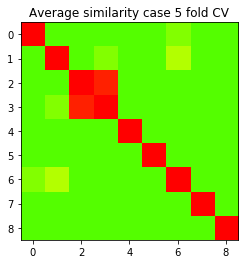

In [14]:
#sns.heatmap(dataframe_ranking_5fold.overlapping.mean())
plt.imshow(average_similarity_5fold,cmap=plt.cm.prism_r)
plt.title('Average similarity case 5 fold CV')

Text(0.5, 1.0, 'Average similarity case 10 fold CV')

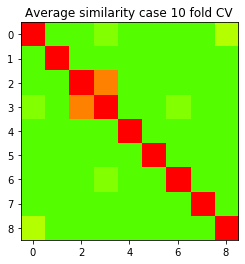

In [19]:
plt.imshow(average_similarity_10fold,cmap=plt.cm.prism_r)
plt.title('Average similarity case 10 fold CV')

Text(0.5, 1.0, 'Average similarity case LOO CV')

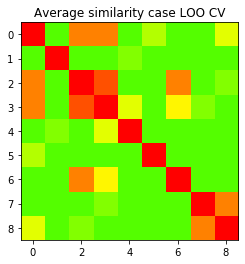

In [20]:
plt.imshow(average_similarity_loo,cmap=plt.cm.prism_r)
plt.title('Average similarity case LOO CV')

### Accuracy similarity matrix

In [15]:
df_5fold_acc=dataframe_accuracies_5fold.copy()
df_10fold_acc=dataframe_accuracies_10fold.copy()
df_loo_acc=dataframe_accuracies_loo.copy()

In [16]:
df_5fold_acc.loc['mean'] =df_5fold_acc.mean()
df_10fold_acc.loc['mean'] =df_10fold_acc.mean()
df_loo_acc.loc['mean'] =df_loo_acc.mean()

In [17]:
acc_sim_matrix_5fold=matrix_acc(list(df_5fold_acc.loc['mean']))
acc_sim_matrix_10fold=matrix_acc(list(df_10fold_acc.loc['mean']))
acc_sim_matrix_loo=matrix_acc(list(df_loo_acc.loc['mean']))

Text(0.5, 1.0, 'Average accuracy similarity matrix case 5-fold CV')

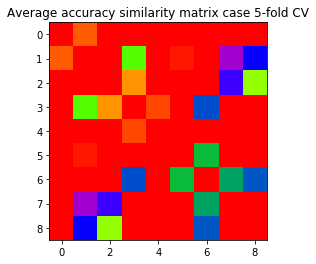

In [18]:
plt.imshow(acc_sim_matrix_5fold,cmap=plt.cm.prism_r)
plt.title('Average accuracy similarity matrix case 5-fold CV')

Text(0.5, 1.0, 'Average accuracy similarity matrix case 10-fold CV')

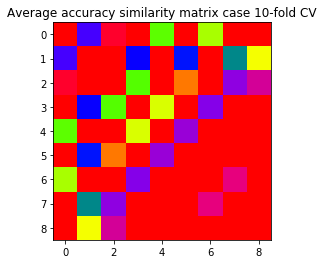

In [25]:
plt.imshow(acc_sim_matrix_10fold,cmap=plt.cm.prism_r)
plt.title('Average accuracy similarity matrix case 10-fold CV')

Text(0.5, 1.0, 'Average accuracy similarity matrix case loo CV')

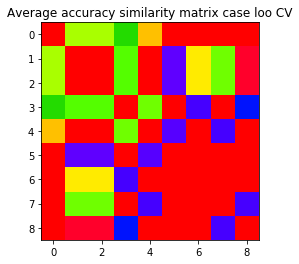

In [26]:
plt.imshow(acc_sim_matrix_loo,cmap=plt.cm.prism_r)
plt.title('Average accuracy similarity matrix case loo CV')

### Final similarity without stability

Text(0.5, 1.0, 'Final similarity matrix without stability: 5-fold cv')

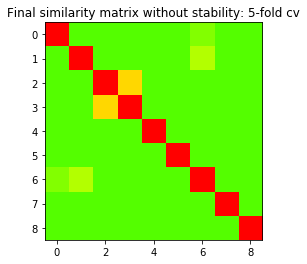

In [19]:
Final_sim_5fold=np.multiply(average_similarity_5fold,acc_sim_matrix_5fold)
plt.imshow(Final_sim_5fold,cmap=plt.cm.prism_r)
plt.title('Final similarity matrix without stability: 5-fold cv')

Text(0.5, 1.0, 'Final similarity matrix without stability: 10-fold cv')

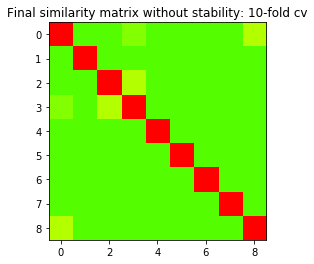

In [20]:
Final_sim_10fold=np.multiply(average_similarity_10fold,acc_sim_matrix_10fold)
plt.imshow(Final_sim_10fold,cmap=plt.cm.prism_r)
plt.title('Final similarity matrix without stability: 10-fold cv')

Text(0.5, 1.0, 'Final similarity matrix without stability: LOO cv')

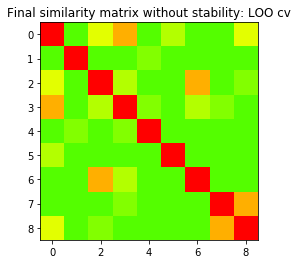

In [21]:
Final_sim_loo=np.multiply(average_similarity_loo,acc_sim_matrix_loo)
plt.imshow(Final_sim_loo,cmap=plt.cm.prism_r)
plt.title('Final similarity matrix without stability: LOO cv')

### Binary overlapping for FS reliefF and k =10 (5-fold,10fold and LOO)

In [35]:
from helpers.reproducibility import *

In [36]:
def binary_intersection(a,b,k):
    ''' A function that return the percentage of common elements to both a and b'''
    sum_=0
    for x in range(a.shape[0]):
        for y in range(a.shape[1]):
            sum_+=np.sum((a[x,y]==b[x,y]))
    #percentage=(sum_*100)/k
    percentage=(sum_*100)/b.size
    return(percentage)

In [37]:
def binary_matrice(FS_k,k):
    n=len(FS_k)
    m=np.ones((n,n))
    for i in range(n):
        for j in range(i+1,n):
            m[i,j]=binary_intersection(FS_k[i],FS_k[j],k)
            m[j,i]=m[i,j]
   # for i in range(n):
    #    m[i,i]=intersection(FS_k[i],FS_k[i])/100
    return(m)

In [38]:
FS_k=[dataframe_ranking_5fold.overlapping[10],dataframe_ranking_10fold.overlapping[10],
      dataframe_ranking_loo.overlapping[10]]
k=10

In [39]:
labels=['5fold','10fold','LOO']
dataframe=pd.DataFrame(binary_matrice(FS_k,k),columns=labels,index=labels)

Text(0.5, 1.0, 'The overlap in % between top 10 features discovered using a pair of CV methods')

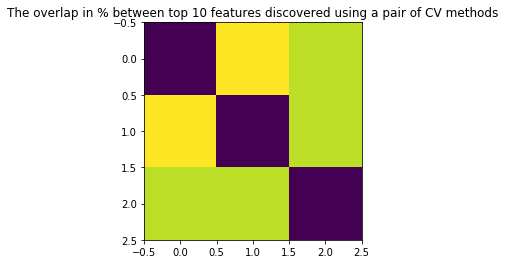

In [40]:
#sns.heatmap(dataframe)
plt.imshow(dataframe)
plt.title('The overlap in % between top 10 features discovered using a pair of CV methods')

In [46]:
pool_FS

[<module 'skfeature.function.similarity_based.reliefF' from '/home/raoua/anaconda3/lib/python3.6/site-packages/skfeature/function/similarity_based/reliefF.py'>,
 <module 'skfeature.function.similarity_based.lap_score' from '/home/raoua/anaconda3/lib/python3.6/site-packages/skfeature/function/similarity_based/lap_score.py'>,
 <module 'skfeature.function.sparse_learning_based.ll_l21' from '/home/raoua/anaconda3/lib/python3.6/site-packages/skfeature/function/sparse_learning_based/ll_l21.py'>,
 <module 'skfeature.function.sparse_learning_based.ls_l21' from '/home/raoua/anaconda3/lib/python3.6/site-packages/skfeature/function/sparse_learning_based/ls_l21.py'>,
 <module 'skfeature.function.sparse_learning_based.UDFS' from '/home/raoua/anaconda3/lib/python3.6/site-packages/skfeature/function/sparse_learning_based/UDFS.py'>,
 <module 'skfeature.function.similarity_based.fisher_score' from '/home/raoua/anaconda3/lib/python3.6/site-packages/skfeature/function/similarity_based/fisher_score.py'>,


# Without stability

### Identify the most reproducible feature selection method

In [28]:
# Centrality measure 
import networkx as nx
G_5fold=nx.from_numpy_matrix(Final_sim_5fold)
#centrality_5fold=nx.degree_centrality(G_5fold)

In [29]:
G_10fold=nx.from_numpy_matrix(Final_sim_10fold)
#centrality_10fold=nx.degree_centrality(G_10fold)

In [30]:
G_loo=nx.from_numpy_matrix(Final_sim_loo)
#centrality_loo=nx.degree_centrality(G_loo)

#### Calculate betweenness and closeness centrality

In [41]:
bc_5fold=nx.betweenness_centrality(G_5fold)
cc_5fold=nx.closeness_centrality(G_5fold)

In [42]:
bc_10fold=nx.betweenness_centrality(G_10fold)
cc_10fold=nx.closeness_centrality(G_10fold)

In [43]:
bc_loo=nx.betweenness_centrality(G_loo)
cc_loo=nx.closeness_centrality(G_loo)

In [44]:
bc_5fold

{0: 0.023809523809523808,
 1: 0.013095238095238094,
 2: 0.04285714285714285,
 3: 0.1125,
 4: 0.04583333333333332,
 5: 0.007142857142857143,
 6: 0.05595238095238095,
 7: 0.026785714285714284,
 8: 0.06488095238095237}

In [45]:
cc_5fold

{0: 0.7272727272727273,
 1: 0.6666666666666666,
 2: 0.8,
 3: 0.8888888888888888,
 4: 0.8,
 5: 0.6666666666666666,
 6: 0.8,
 7: 0.7272727272727273,
 8: 0.8888888888888888}

Text(0.5, 1.0, 'Betweeness centrality 5-fold')

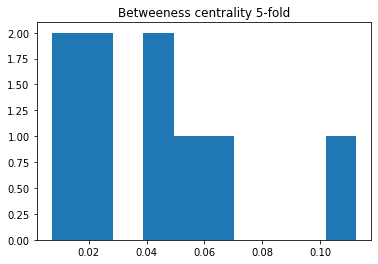

In [43]:
plt.hist(bc_5fold.values())
plt.title('Betweeness centrality 5-fold')

Text(0.5, 1.0, 'closeness centrality 5-fold')

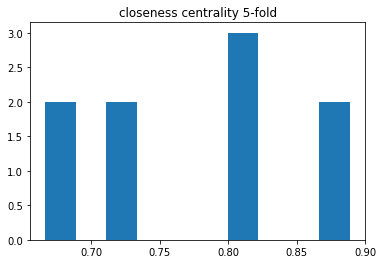

In [44]:
plt.hist(cc_5fold.values())
plt.title('closeness centrality 5-fold')

In [47]:
bc_10fold

{0: 0.08035714285714284,
 1: 0.07738095238095238,
 2: 0.05059523809523809,
 3: 0.23809523809523808,
 4: 0.0,
 5: 0.07142857142857142,
 6: 0.008928571428571428,
 7: 0.011904761904761904,
 8: 0.13988095238095236}

In [48]:
cc_10fold

{0: 0.7272727272727273,
 1: 0.6666666666666666,
 2: 0.6666666666666666,
 3: 0.8,
 4: 0.5714285714285714,
 5: 0.6666666666666666,
 6: 0.5714285714285714,
 7: 0.5714285714285714,
 8: 0.7272727272727273}

In [49]:
bc_loo

{0: 0.16369047619047616,
 1: 0.017857142857142856,
 2: 0.10714285714285714,
 3: 0.45535714285714285,
 4: 0.0,
 5: 0.011904761904761904,
 6: 0.026785714285714284,
 7: 0.11607142857142856,
 8: 0.029761904761904757}

In [50]:
cc_loo

{0: 0.6666666666666666,
 1: 0.5333333333333333,
 2: 0.6666666666666666,
 3: 0.8,
 4: 0.5,
 5: 0.47058823529411764,
 6: 0.5714285714285714,
 7: 0.6153846153846154,
 8: 0.5333333333333333}

Text(0.5, 1.0, 'Betweeness centrality 10-fold')

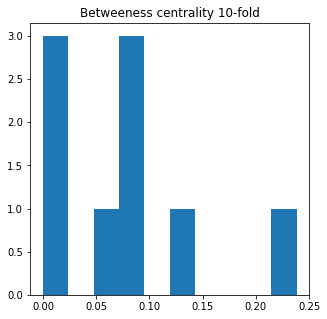

In [108]:
plt.hist(bc_10fold.values())
plt.title('Betweeness centrality 10-fold')

Text(0.5, 1.0, 'Closeness centrality 10-fold')

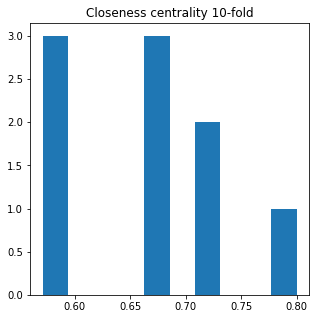

In [109]:
plt.hist(cc_10fold.values())
plt.title('Closeness centrality 10-fold')

Text(0.5, 1.0, 'Betweeness centrality loo')

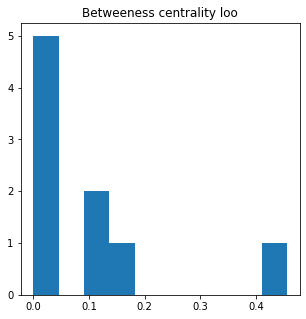

In [110]:
plt.hist(bc_loo.values())
plt.title('Betweeness centrality loo')

Text(0.5, 1.0, 'Closeness centrality loo')

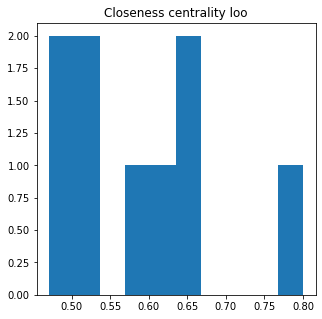

In [111]:
plt.hist(cc_loo.values())
plt.title('Closeness centrality loo')

Nodes of graph: 
[0, 1, 2, 3, 4, 5, 6, 7, 8]
Edges of graph: 
[(0, 0), (0, 1), (0, 3), (0, 4), (0, 6), (0, 8), (1, 1), (1, 2), (1, 3), (1, 6), (2, 2), (2, 3), (2, 4), (2, 6), (2, 7), (2, 8), (3, 3), (3, 4), (3, 5), (3, 7), (3, 8), (4, 4), (4, 5), (4, 6), (4, 8), (5, 5), (5, 7), (5, 8), (6, 6), (6, 7), (6, 8), (7, 7), (7, 8), (8, 8)]


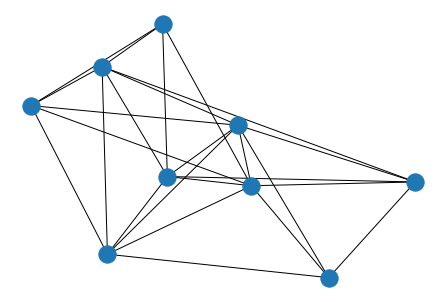

In [45]:
import networkx as nx
import matplotlib.pyplot as plt

#G=nx.path_graph(4)

print("Nodes of graph: ")
print(G_5fold.nodes())
print("Edges of graph: ")
print(G_5fold.edges())
nx.draw(G_5fold)
#plt.savefig("path_graph1.png")
plt.show()

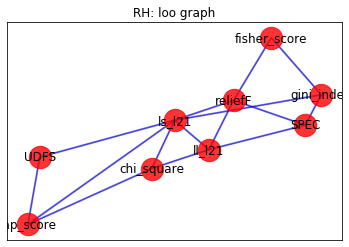

In [46]:
import matplotlib.pyplot as plt

import networkx as nx
G=G_loo
#G=nx.from_numpy_matrix(final_sim_kf5)
pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,
                       nodelist=[0,1,2,3,4,5,6,7,8],
                       node_color='r',
                       node_size=500,
                   alpha=0.8)
#nx.draw_networkx_nodes(G,pos,
#                       nodelist=[4,5,6,7],
#                       node_color='b',
#                       node_size=500,
#                   alpha=0.8)

# edges
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
nx.draw_networkx_edges(G,pos,
                       width=2,alpha=0.5,edge_color='b')
#nx.draw_networkx_edges(G,pos,
#                       edgelist=[(4,5),(5,6),(6,7),(7,4)],
#                       width=8,alpha=0.5,edge_color='b')

#reliefF,lap_score,ll_l21,UDFS,fisher_score,chi_square,gini_index
# some math labels
labels={}
labels[0]=r'reliefF'
labels[1]=r'lap_score'
labels[2]=r'll_l21'
labels[3]=r'ls_l21'
labels[4]=r'UDFS'
labels[5]=r'fisher_score'
labels[6]=r'chi_square'
labels[7]=r'gini_index'
labels[8]=r'SPEC'
nx.draw_networkx_labels(G,pos,labels,font_size=12)

#plt.axis('off')

plt.rcParams["figure.figsize"] = (5,5)
#plt.savefig("5fold_graph.png") # save as png
#plt.figure(figsize=(10,10))
plt.title('RH: loo graph')
plt.show() # display

# Stability construction

In [62]:
from helpers.similarities import *

In [65]:

def kuncheva_stability(featidx,d):
    q,k = featidx.shape
    #q = size(featidx,1);
    #q=num_methods
    r = np.zeros((q,q))
    for n in range(1,q-1):
        for m in range(n,q-1):
            r[n,m] = len(np.intersect1d(featidx[n,0],featidx[n,1])) + len(np.intersect1d(featidx[n,0],featidx[n + 1,1])) + len(np.intersect1d(featidx[n,0],featidx[n-1,1]))
    A = np.true_divide(np.subtract(r, (k**2/d)),(k-(k**2/d)))
    S = 2*sum(sum(A))/(q*(q-1))
    return(S)

def get_ranking_matrix(a,k):
    #The columns are the respective rankings of pool_FS
    #a=dataframe_ranking_5fold.loc[10]
    #a=a.as_matrix(columns=None)
    a=np.array(a)
    b=np.zeros((k,len(pool_FS)))
    for i in range(len(a)):
        b[:,i]=a[i]
    return(b)

def normalize_stability(matrix):
    n,m=matrix.shape
    norm_mat = np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            norm_mat[i,j] = 100*(matrix[i,j] - np.min(matrix)) / (np.max(matrix) - np.min(matrix))
    return(norm_mat)

def get_stability(ranking_matrix):
    
    stab_mat=np.zeros((len(pool_FS),len(pool_FS)))
    for i in range(len(pool_FS)):
        for j in range(len(pool_FS)):
            if i!=j:
                stab_mat[i,j] = kuncheva_stability(np.transpose(np.vstack((ranking_matrix[:,i],ranking_matrix[:,j]))),595)
    stab_mat=np.abs(stab_mat)
    stab_mat=normalize_stability(stab_mat)
    return(stab_mat)

def rowStability(row):
    matrix=get_ranking_matrix(row,row.name)
    return(get_stability(matrix))

In [66]:
pool_FS=[reliefF,lap_score,ll_l21,ls_l21,UDFS,fisher_score,chi_square,gini_index,SPEC]

In [47]:
df_ranking_5fold=dataframe_ranking_5fold.copy()

In [48]:
df_ranking_10fold=dataframe_ranking_10fold.copy()

In [49]:
df_ranking_loo=dataframe_ranking_loo.copy()

In [50]:
df_ranking_5fold.drop(['overlapping'],axis=1,inplace=True)

In [51]:
df_ranking_10fold.drop(['overlapping'],axis=1,inplace=True)

In [52]:
df_ranking_loo.drop(['overlapping'],axis=1,inplace=True)

In [53]:
df_ranking_5fold.columns

Index(['reliefF', 'lap_score', 'll_l21', 'ls_l21', 'UDFS', 'fisher_score',
       'chi_square', 'gini_index', 'SPEC'],
      dtype='object')

In [54]:
df_ranking_5fold['stability']=df_ranking_5fold.apply(rowStability,axis=1)

In [61]:
df_ranking_10fold['stability']=df_ranking_10fold.apply(rowStability,axis=1)

In [68]:
df_ranking_loo['stability']=df_ranking_loo.apply(rowStability,axis=1)

#### Mean stability K

In [69]:
average_5fold_stability=df_ranking_5fold.stability.mean()
average_10fold_stability=df_ranking_10fold.stability.mean()
average_loo_stability=df_ranking_loo.stability.mean()

### Store similarities for later use on Hypergraph Learning framework

In [73]:
import pickle
with open('RH_metrics/similarities/average_stability_5fold','wb') as f: pickle.dump(average_5fold_stability, f)
with open('RH_metrics/similarities/average_stability_10fold','wb') as f: pickle.dump(average_10fold_stability, f)
with open('RH_metrics/similarities/average_stability_loo','wb') as f: pickle.dump(average_loo_stability, f)

### Uncomment this to read similarities

Text(0.5, 1.0, 'Distribution of mean stability')

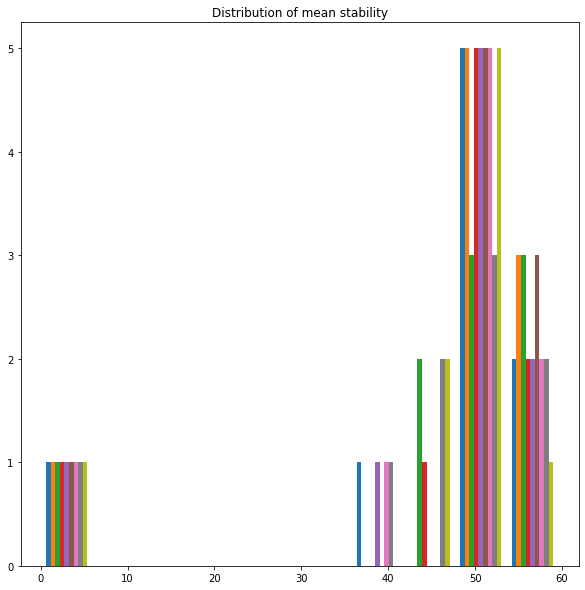

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,10)
plt.hist(average_5fold_stability)
plt.title('Distribution of mean stability')

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(average_5fold_stability))

MinMaxScaler(copy=True, feature_range=(0, 1))


In [54]:
normalized_stability=scaler.transform(average_5fold_stability)

Text(0.5, 1.0, 'Distribution of mean stability')

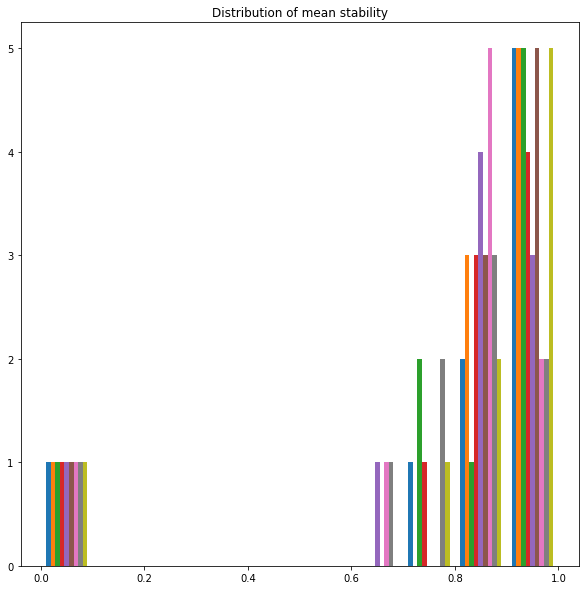

In [55]:
plt.rcParams["figure.figsize"] = (10,10)
plt.hist(normalized_stability)
plt.title('Distribution of mean stability')

Text(0.5, 1.0, 'RH: Average 5-fold stability')

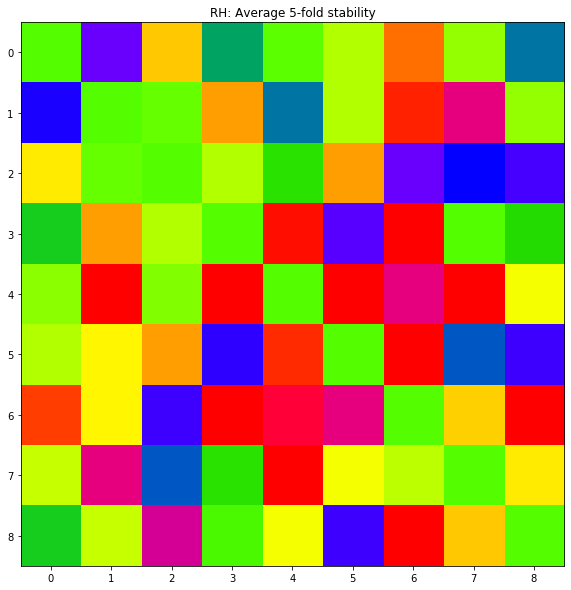

In [56]:
plt.imshow(average_5fold_stability,cmap=plt.cm.prism_r)
plt.title('RH: Average 5-fold stability')

Text(0.5, 1.0, 'RH: Average 10-fold stability')

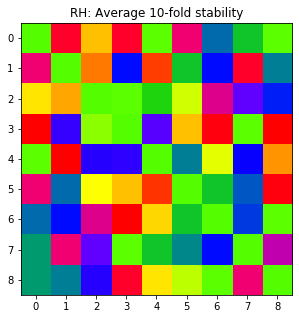

In [87]:
plt.imshow(average_10fold_stability,cmap=plt.cm.prism_r)
plt.title('RH: Average 10-fold stability')

Text(0.5, 1.0, 'RH: Average loo stability')

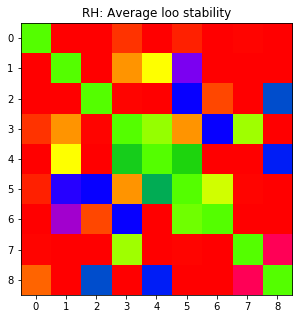

In [88]:
plt.imshow(average_loo_stability,cmap=plt.cm.prism_r)
plt.title('RH: Average loo stability')

### Similarity with stability

In [90]:
acc_sim_matrix_5fold

array([[20.        , 17.93721973, 20.        , 20.        , 20.        ,
        20.        , 20.        , 20.        , 20.        ],
       [17.93721973, 20.        , 20.        , 10.03344482, 20.        ,
        17.04545455, 20.        , 12.5       , 15.50387597],
       [20.        , 20.        , 20.        , 11.26760563, 20.        ,
        20.        , 20.        , 14.47527141, 18.66251944],
       [20.        , 10.03344482, 11.26760563, 20.        , 12.25740552,
        20.        , 10.83032491, 20.        , 20.        ],
       [20.        , 20.        , 20.        , 12.25740552, 20.        ,
        20.        , 20.        , 16.15074024, 20.        ],
       [20.        , 17.04545455, 20.        , 20.        , 20.        ,
        20.        , 19.48051948, 20.        , 20.        ],
       [20.        , 20.        , 20.        , 10.83032491, 20.        ,
        19.48051948, 20.        , 13.76146789, 17.49271137],
       [20.        , 12.5       , 14.47527141, 20.        , 16

In [57]:
Final_sim_5fold_stability=np.multiply(acc_sim_matrix_5fold,average_similarity_5fold,average_5fold_stability)

In [58]:
Final_sim_10fold_stability=np.multiply(acc_sim_matrix_10fold,average_similarity_10fold,average_10fold_stability)

In [59]:
Final_sim_loo_stability=np.multiply(acc_sim_matrix_loo,average_similarity_loo,average_loo_stability)

Text(0.5, 1.0, 'RH: Final similarity matrice with stability 5fold')

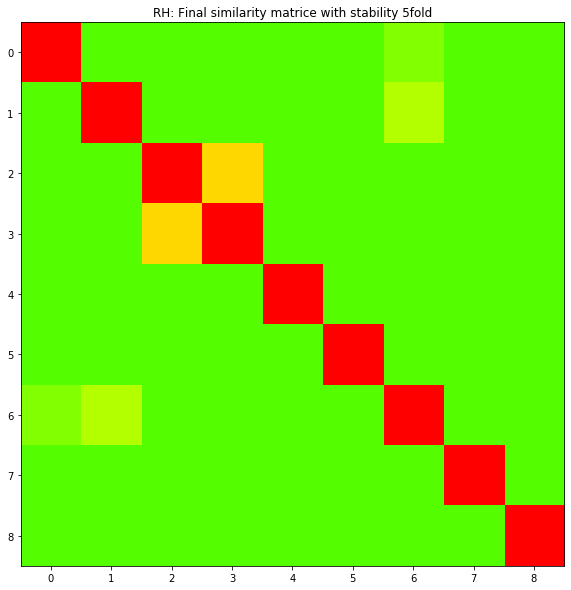

In [60]:
plt.imshow(Final_sim_5fold_stability,cmap=plt.cm.prism_r)
plt.title('RH: Final similarity matrice with stability 5fold')

Text(0.5, 1.0, 'RH:Final similarity matrice with stability 10-fold')

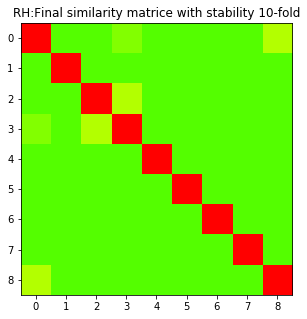

In [102]:
plt.imshow(Final_sim_10fold_stability,cmap=plt.cm.prism_r)
plt.title('RH:Final similarity matrice with stability 10-fold')

Text(0.5, 1.0, 'RH:Final similarity matrice with stability loo')

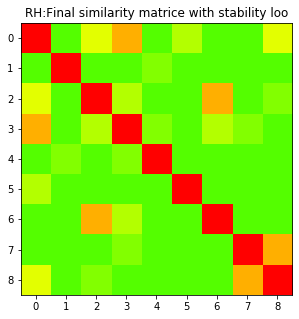

In [103]:
plt.imshow(Final_sim_loo_stability,cmap=plt.cm.prism_r)
plt.title('RH:Final similarity matrice with stability loo')

# Centrality  with stability

In [61]:
import networkx as nx
G_5fold_stability=nx.from_numpy_matrix(Final_sim_5fold_stability)
G_10fold_stability=nx.from_numpy_matrix(Final_sim_10fold_stability)
G_loo_stability=nx.from_numpy_matrix(Final_sim_loo_stability)
#centrality_5fold_stability=nx.degree_centrality(G_5fold_stability)

In [62]:
cc_5fold=nx.closeness_centrality(G_5fold_stability)
bc_5fold=nx.betweenness_centrality(G_5fold_stability)
cc_10fold=nx.closeness_centrality(G_10fold_stability)
bc_10fold=nx.betweenness_centrality(G_10fold_stability)
cc_loo=nx.closeness_centrality(G_loo_stability)
bc_loo=nx.betweenness_centrality(G_loo_stability)

In [63]:
cc_5fold

{0: 0.7272727272727273,
 1: 0.6666666666666666,
 2: 0.8,
 3: 0.8888888888888888,
 4: 0.8,
 5: 0.6666666666666666,
 6: 0.8,
 7: 0.7272727272727273,
 8: 0.8888888888888888}

In [64]:
bc_5fold

{0: 0.023809523809523808,
 1: 0.013095238095238094,
 2: 0.04285714285714285,
 3: 0.1125,
 4: 0.04583333333333332,
 5: 0.007142857142857143,
 6: 0.05595238095238095,
 7: 0.026785714285714284,
 8: 0.06488095238095237}

In [65]:
cc_10fold

{0: 0.7272727272727273,
 1: 0.6666666666666666,
 2: 0.6666666666666666,
 3: 0.8,
 4: 0.5714285714285714,
 5: 0.6666666666666666,
 6: 0.5714285714285714,
 7: 0.5714285714285714,
 8: 0.7272727272727273}

Text(0.5, 1.0, 'Betweeness centrality 5-fold')

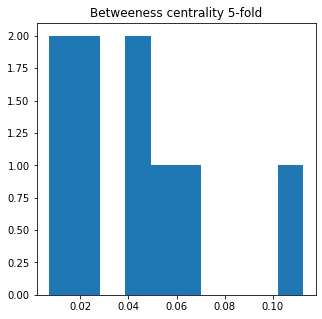

In [112]:
plt.hist(bc_5fold.values())
plt.title('Betweeness centrality 5-fold')

Text(0.5, 1.0, 'Closeness centrality 5-fold')

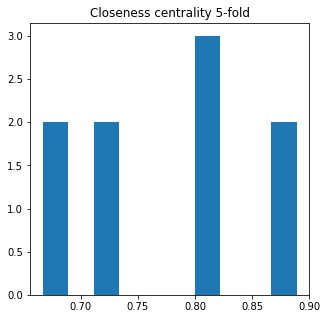

In [113]:
plt.hist(cc_5fold.values())
plt.title('Closeness centrality 5-fold')

In [195]:
cc_5fold

{0: 0.8,
 1: 0.7272727272727273,
 2: 0.7272727272727273,
 3: 0.8888888888888888,
 4: 0.8,
 5: 0.6666666666666666,
 6: 0.8,
 7: 0.8,
 8: 0.8888888888888888}

In [200]:
bc_10fold

{0: 0.019047619047619046,
 1: 0.057738095238095234,
 2: 0.027976190476190474,
 3: 0.1261904761904762,
 4: 0.09345238095238093,
 5: 0.08154761904761904,
 6: 0.023214285714285715,
 7: 0.01607142857142857,
 8: 0.019047619047619046}

In [201]:
cc_10fold

{0: 0.6666666666666666,
 1: 0.7272727272727273,
 2: 0.7272727272727273,
 3: 0.8888888888888888,
 4: 0.8,
 5: 0.8,
 6: 0.7272727272727273,
 7: 0.6666666666666666,
 8: 0.6666666666666666}

In [202]:
bc_loo

{0: 0.0,
 1: 0.125,
 2: 0.3988095238095238,
 3: 0.15476190476190477,
 4: 0.047619047619047616,
 5: 0.10119047619047618,
 6: 0.0,
 7: 0.10714285714285714,
 8: 0.10119047619047618}

In [203]:
cc_loo

{0: 0.5,
 1: 0.5333333333333333,
 2: 0.7272727272727273,
 3: 0.6153846153846154,
 4: 0.47058823529411764,
 5: 0.5333333333333333,
 6: 0.5,
 7: 0.5714285714285714,
 8: 0.6153846153846154}

### Draw the graphs after stability 

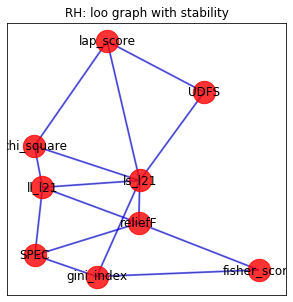

In [114]:
import matplotlib.pyplot as plt

import networkx as nx
G=G_loo_stability
#G=nx.from_numpy_matrix(final_sim_kf5)
pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,
                       nodelist=[0,1,2,3,4,5,6,7,8],
                       node_color='r',
                       node_size=500,
                   alpha=0.8)
#nx.draw_networkx_nodes(G,pos,
#                       nodelist=[4,5,6,7],
#                       node_color='b',
#                       node_size=500,
#                   alpha=0.8)

# edges
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
nx.draw_networkx_edges(G,pos,
                       width=2,alpha=0.5,edge_color='b')
#nx.draw_networkx_edges(G,pos,
#                       edgelist=[(4,5),(5,6),(6,7),(7,4)],
#                       width=8,alpha=0.5,edge_color='b')

#reliefF,lap_score,ll_l21,UDFS,fisher_score,chi_square,gini_index
# some math labels
labels={}
labels[0]=r'reliefF'
labels[1]=r'lap_score'
labels[2]=r'll_l21'
labels[3]=r'ls_l21'
labels[4]=r'UDFS'
labels[5]=r'fisher_score'
labels[6]=r'chi_square'
labels[7]=r'gini_index'
labels[8]=r'SPEC'
nx.draw_networkx_labels(G,pos,labels,font_size=12)

#plt.axis('off')

plt.rcParams["figure.figsize"] = (5,5)
#plt.savefig("5foldstability_graph.png") # save as png
plt.title('RH: loo graph with stability')
#plt.figure(figsize=(10,10))
plt.show() # display

# Reproducibility

In [69]:
def intersection(a,b):
    ''' A function that return the percentage of common elements to both a and b'''
    sum_=0
    for x in range(a.shape[0]):
       # for y in range(a.shape[1]):
        sum_+=np.sum((a[x]==b[x]))
    #percentage=(sum_*100)/a.size
    percentage=(sum_)/a.size
    return(percentage)

In [70]:
def FS_to_FS_similarity(FS_k,k):
    n=len(FS_k)
    m=np.ones((n,n))
    for i in range(n):
        for j in range(i+1,n):
            m[i,j]=intersection(FS_k[i],FS_k[j])/k
            m[j,i]=m[i,j]
    for i in range(n):
        m[i,i]=intersection(FS_k[i],FS_k[i])/k#/100
    return(m)

In [71]:
def Nicholas_Reproducibility(k):
    
    top_k_ls_l21=[dataframe_ranking_5fold.ls_l21.loc[k],dataframe_ranking_10fold.ls_l21.loc[k],dataframe_ranking_loo.ls_l21.loc[k]]
    #top_k_reliefF=[df_ranking_5fold.reliefF.loc[k],df_ranking_10fold.reliefF.loc[k],df_ranking_loo.reliefF.loc[k]]
    #top_k_lap=[df_ranking_5fold.lap_score.loc[k],df_ranking_10fold.lap_score.loc[k],df_ranking_loo.lap_score.loc[k]]
    #top_k_ll=[df_ranking_5fold.ll_l21.loc[k],df_ranking_10fold.ll_l21.loc[k],df_ranking_loo.ll_l21.loc[k]]
    mat_ls_l21=FS_to_FS_similarity(top_k_ls_l21,k)
    #mat_reliefF=FS_to_FS_similarity(top_k_reliefF,k)
    #mat_lap=FS_to_FS_similarity(top_k_lap,k)
    #mat_ll=FS_to_FS_similarity(top_k_ll,k)
    #avg_mat= (mat_reliefF+mat_lap+mat_ll)/3
    labels=['5fold','10fold','LOO']
    dataframe_ls_l21=pd.DataFrame(mat_ls_l21,columns=labels,index=labels)
    #dataframe_lap=pd.DataFrame(mat_lap,columns=labels,index=labels)
    #dataframe_ll=pd.DataFrame(mat_ll,columns=labels,index=labels)
    #dataframe_avg=pd.DataFrame(avg_mat,columns=labels,index=labels)
    #return(dataframe_reliefF,dataframe_lap,dataframe_ll,dataframe_avg)
    return(dataframe_ls_l21)

In [73]:
df_ls_l21_reproducibility=Nicholas_Reproducibility(k)

In [74]:
Average_Nicholas_reproducibility=(np.average(np.triu(df_ls_l21_reproducibility.values,k=1)))*(10**3)

In [75]:
Average_Nicholas_reproducibility

3.333333333333333